In [182]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import koreanize_matplotlib
import numpy as np

font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name) 

In [120]:
file_path = './서울구인구총계.xlsx'

In [121]:
seoulDF = pd.read_excel(file_path) 

<Figure size 1200x600 with 0 Axes>

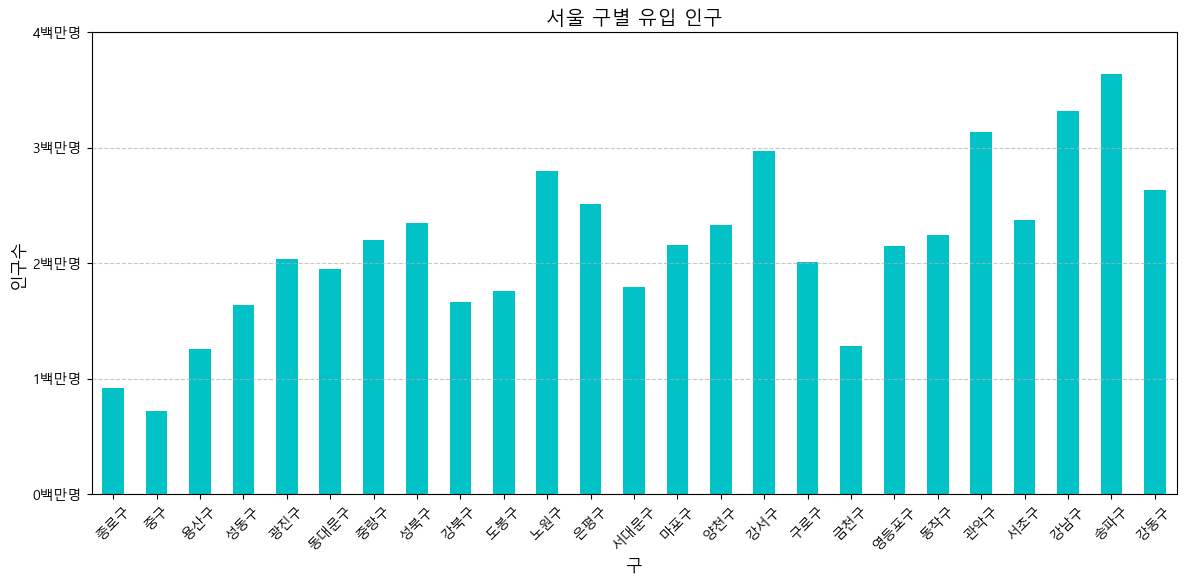

In [190]:
# 데이터 변환: 구 이름을 인덱스로 설정
df_t = seoulDF.set_index('시점').T

# 막대그래프 생성
plt.figure(figsize=(12, 6))
df_t.plot(kind='bar', legend=False, figsize=(14, 6), color='#00c2c7')

# 그래프 제목 및 라벨 설정
plt.title('서울 구별 유입 인구', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('인구수', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.yticks([1e6 * i for i in range(0,5)], [f"{i}백만명" for i in range(0,5)])

# 그래프 표시
plt.show()

In [123]:
df_t.head()

시점,총계
종로구,919646
중구,723863
용산구,1254826
성동구,1639596
광진구,2039436


<Figure size 1000x500 with 0 Axes>

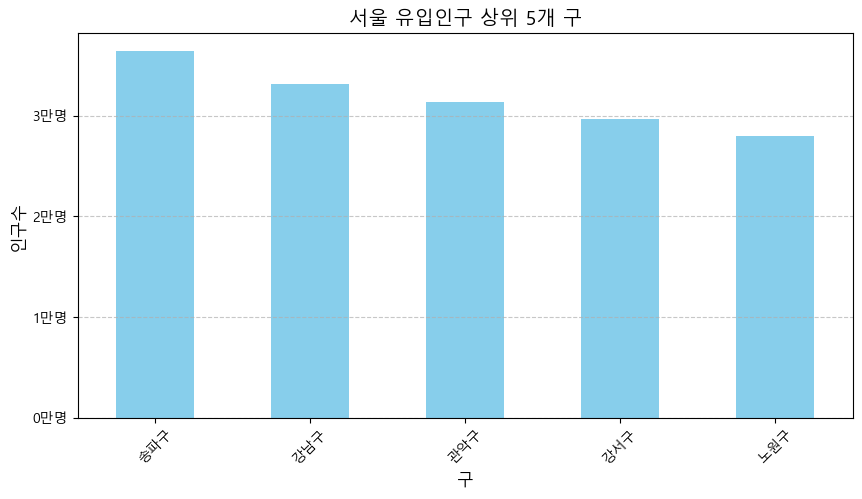

In [124]:
# 상위 5개 인구 수가 많은 구 찾기
top_5_gu = df_t.nlargest(5, columns=['총계'])

# 막대그래프 생성
plt.figure(figsize=(10, 5))
top_5_gu.plot(kind='bar', legend=False, figsize=(10, 5), color='skyblue')

# 그래프 제목 및 라벨 설정
plt.title('서울 유입인구 상위 5개 구', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('인구수', fontsize=12)
plt.xticks(rotation=45)
plt.yticks([1e6 * i for i in range(0,4)], [f"{i}만명" for i in range(0,4)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 표시
plt.show()

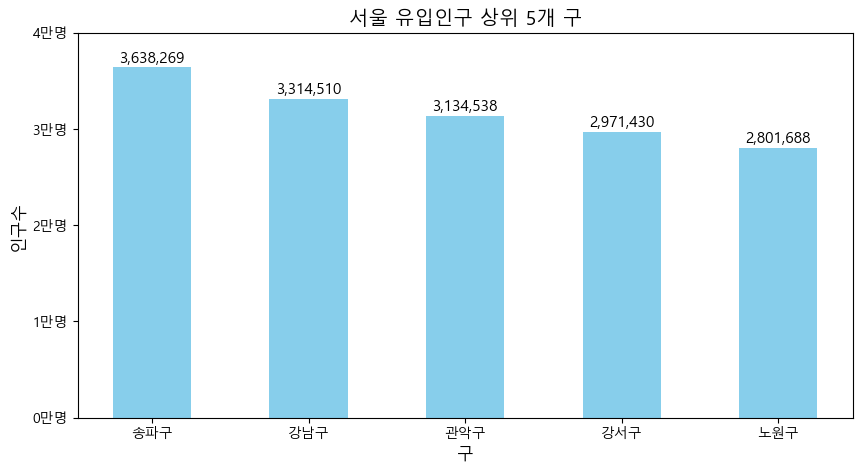

In [171]:
# 상위 5개 인구 수가 많은 구 찾기
top_5_gu = df_transposed.nlargest(5, columns=['총계'])

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(top_5_gu.index, top_5_gu["총계"], color='skyblue', width=0.5)

# 그래프 제목 및 라벨 설정
ax.set_title('서울 유입인구 상위 5개 구', fontsize=14)
ax.set_xlabel('구', fontsize=12)
ax.set_ylabel('인구수', fontsize=12)

# x축 레이블 설정 (겹침 방지)
ax.set_xticks(range(len(top_5_gu.index, )))
ax.set_xticklabels(top_5_gu.index, ha='center')

# y축 눈금 설정 (천 단위 콤마 추가)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.yticks([1e6 * i for i in range(0,5)], [f"{i}만명" for i in range(0,5)])

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),  # 위로 5포인트 이동
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

# 그래프 표시
plt.show()


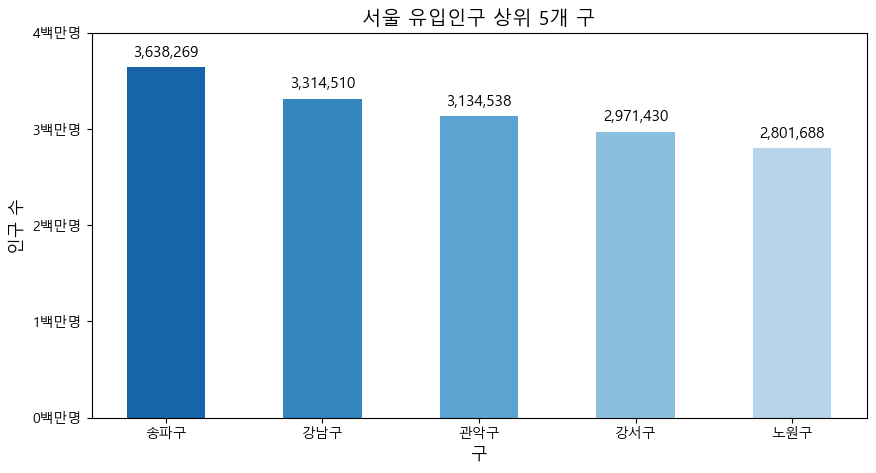

In [188]:
# 다시 데이터프레임 정의
data = {
    "구": ["송파구", "강남구", "관악구", "강서구", "노원구"],
    "총계": [3638269, 3314510, 3134538, 2971430, 2801688]
}

df_top5 = pd.DataFrame(data)

# 색상 그라데이션 반대로 적용 (인구 많은 쪽을 진하게)
colors_reversed = plt.cm.Blues(np.linspace(0.8, 0.3, len(df_top5)))

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(df_top5["구"], df_top5["총계"], color=colors_reversed, width=0.5)

# 그래프 제목 및 라벨 설정
ax.set_title('서울 유입인구 상위 5개 구', fontsize=14)
ax.set_xlabel('구', fontsize=12)
ax.set_ylabel('인구 수', fontsize=12)

# y축 눈금 설정 (만 단위 표기)
plt.yticks([i * 10**6 for i in range(0, 5)], [f"{i}백만명" for i in range(0, 5)])

# 막대 위에 인구 수 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 위로 이동
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

# 그래프 표시
plt.show()



<Figure size 1000x500 with 0 Axes>

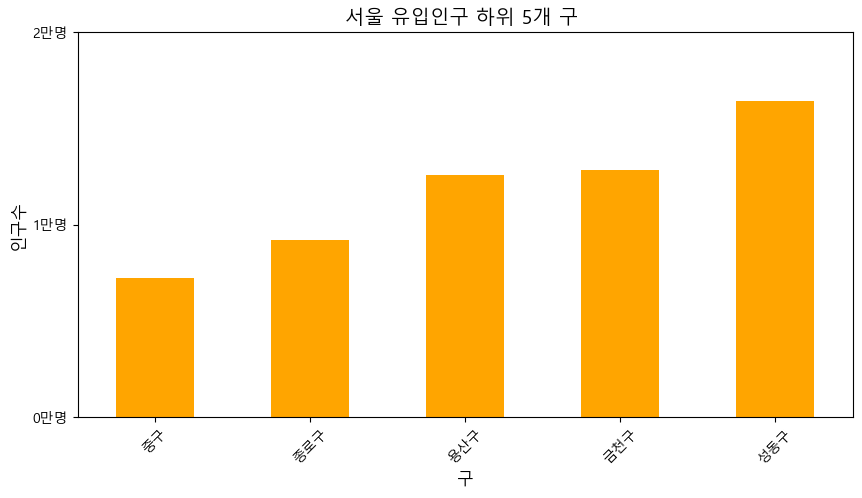

In [160]:
# 하위 5개 인구 수가 적은 구 찾기
bottom_5_gu = df_t.nsmallest(5, columns=['총계'])

# 막대그래프 생성
plt.figure(figsize=(10, 5))
bottom_5_gu.plot(kind='bar', legend=False, figsize=(10, 5), color='orange')

# 그래프 제목 및 라벨 설정
plt.title('서울 유입인구 하위 5개 구 ', fontsize=14)
plt.xlabel('구', fontsize=12)
plt.ylabel('인구수', fontsize=12)
plt.yticks([1e6 * i for i in range(0,3)], [f"{i}만명" for i in range(0,3)])

plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# y축 눈금 설정 (천 단위 콤마 추가)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 각 막대 위에 인구 수 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 약간 위로 조정
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# 그래프 표시
plt.show() 

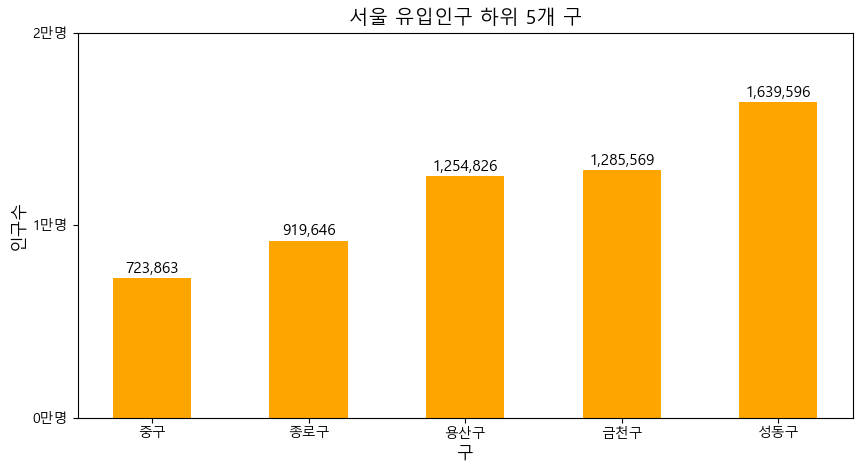

In [180]:
# 데이터 전처리 (행과 열 변환)
df_transposed = seoulDF.set_index("시점").T

# 하위 5개 인구 수가 적은 구 찾기
bottom_5_gu = df_transposed.nsmallest(5, columns=['총계'])

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(bottom_5_gu.index, bottom_5_gu["총계"], color='orange', width=0.5)

# 그래프 제목 및 라벨 설정
ax.set_title('서울 유입인구 하위 5개 구', fontsize=14)
ax.set_xlabel('구', fontsize=12)
ax.set_ylabel('인구수', fontsize=12)
plt.yticks([1e6 * i for i in range(0,3)], [f"{i}만명" for i in range(0,3)])

# x축 레이블 중앙 정렬
ax.set_xticks([bar.get_x() + bar.get_width() / 2 for bar in bars])
ax.set_xticklabels(bottom_5_gu.index, ha='center')

# y축 눈금 설정 (천 단위 콤마 추가)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# 각 막대 위에 인구 수 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

# 그래프 표시
plt.show()

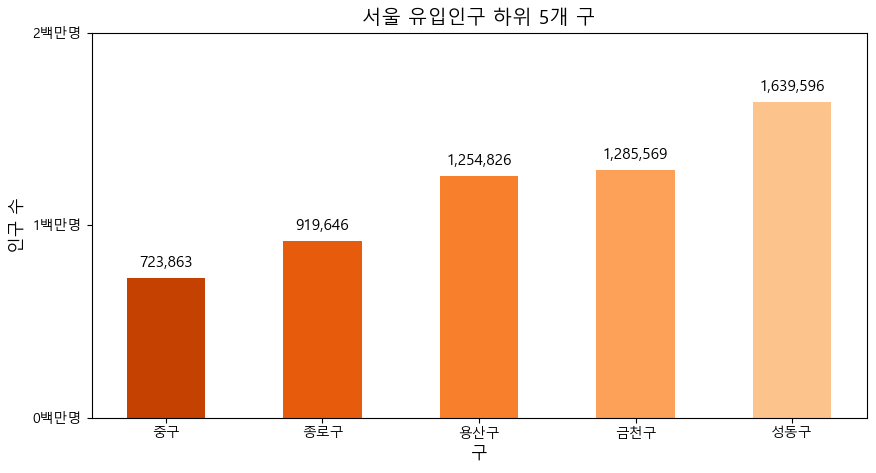

In [189]:
# 하위 5개 인구 데이터 다시 정의
data_bottom = {
    "구": ["중구", "종로구", "용산구", "금천구", "성동구"],
    "총계": [723863, 919646, 1254826, 1285569, 1639596]
}

df_bottom5 = pd.DataFrame(data_bottom)

# 색상 그라데이션 적용 (인구 적은 쪽을 진하게)
colors_reversed = plt.cm.Oranges(np.linspace(0.8, 0.3, len(df_bottom5)))

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(df_bottom5["구"], df_bottom5["총계"], color=colors_reversed, width=0.5)

# 그래프 제목 및 라벨 설정
ax.set_title('서울 유입인구 하위 5개 구', fontsize=14)
ax.set_xlabel('구', fontsize=12)
ax.set_ylabel('인구 수', fontsize=12)

# y축 눈금 설정 (만 단위 표기)
plt.yticks([i * 10**6 for i in range(0, 3)], [f"{i}백만명" for i in range(0, 3)])

# 막대 위에 인구 수 표시
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{int(height):,}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 위로 이동
                textcoords="offset points",
                ha='center', va='bottom', fontsize=11)

# 그래프 표시
plt.show()
